## **LIVER PATIENT ANALYSIS**

- The data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patients (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records. Any patient whose age exceeded 89 is listed as being of age "90". 

In [1]:
import nump as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [98]:
df = pd.read_csv('../data/indian_liver_patients.csv')

In [99]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [100]:
df.describe(include = 'all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [101]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Label                         0
dtype: int64

In [102]:
# dropping the rows having null/missing values
# saving dataframe into z variable
z = df.fillna(" ")

In [103]:
# checking if dataframe has any null values left

z['Albumin_and_Globulin_Ratio'].isnull().sum()

0

In [104]:
# dropping the target class and saving dataframe into X variable
X = z.drop('Label', axis=1)

# storing Label column in y variable
y = df['Label']

# displaying the dataframe shapes 
print(X.head(3))
print(y.head(3))

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   

   Albumin Albumin_and_Globulin_Ratio  
0      3.3                        0.9  
1      3.2                       0.74  
2      3.3                       0.89  
0    1
1    1
2    1
Name: Label, dtype: int64


In [105]:
y.shape

(583,)

In [106]:
X.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
dtype: int64

In [107]:
X.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000


In [108]:
X.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.4


In [109]:
X.shape

(583, 10)

In [77]:
#importing label encoder to transform string values into numericals

from sklearn.preprocessing import LabelEncoder

In [78]:
# le fn of LabelEncoder()

le = LabelEncoder()

In [79]:
# saving all the cloumns into cols variable

cols =['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']

In [80]:
#converting all the attribute values to string
X[cols] = X[cols].astype(str)

In [81]:
X.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio    False
dtype: bool

In [82]:
#converting into numric values by LabelEncoder 

X[cols] = X[cols].apply(LabelEncoder().fit_transform)
X.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,56,0,3,0,78,35,46,34,21,32
1,53,1,18,62,245,120,1,41,20,24
2,53,1,101,53,210,115,143,36,21,31
3,49,1,6,3,73,23,55,34,22,38
4,63,1,76,36,87,67,131,39,12,5


In [83]:
# shape of both X and y should be same/equal
print(X.shape[0] == y.shape[0])

True


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.2)

In [85]:

print(X_train.shape)
print(y_test.shape)

(466, 10)
(117,)


## **Correlation map between attributes**
- seaborn heatmap plot of all the attributes

<AxesSubplot: >

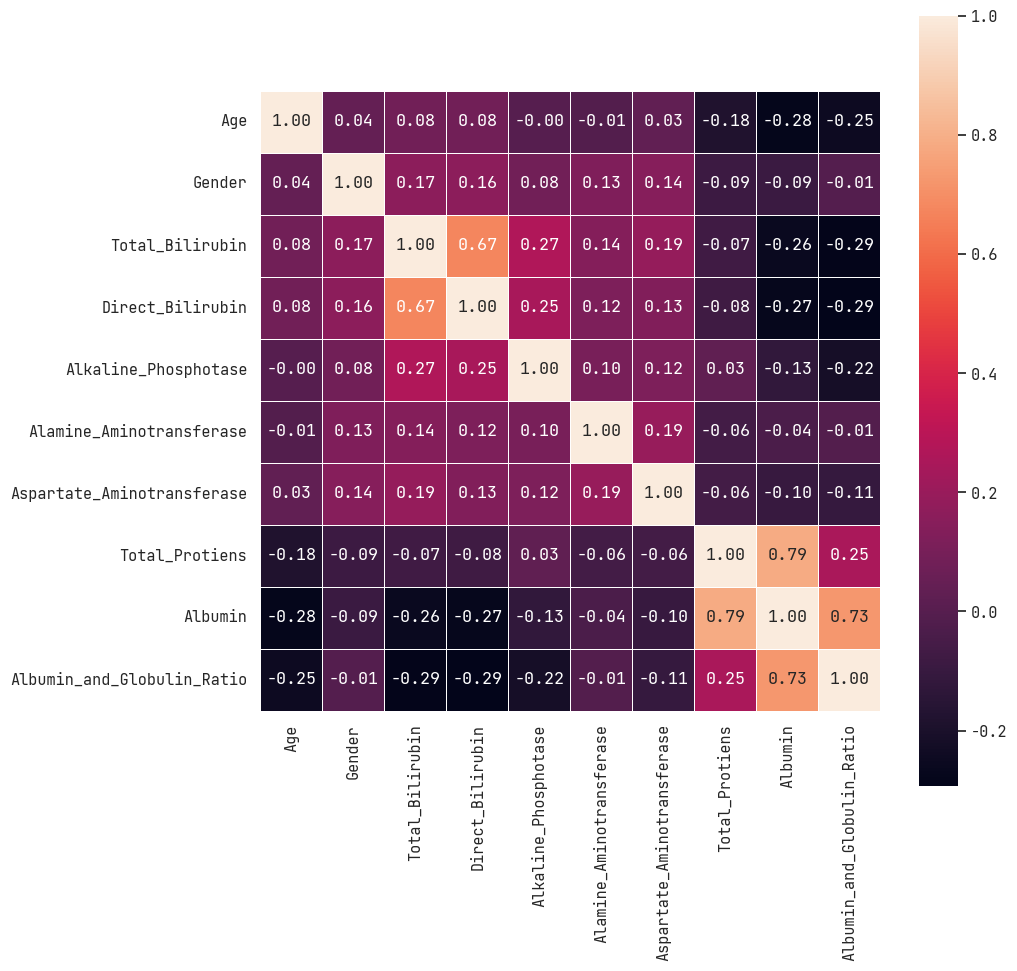

In [86]:
correlations = X.corr()

sns.set_theme(style = 'dark',font='jetbrains mono',font_scale=1, palette = 'rocket_r')

# cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap( correlations,
            fmt='0.2f',
            square = True,
            linewidths = 0.6,
            annot = True,
            ax=ax
           )

<AxesSubplot: >

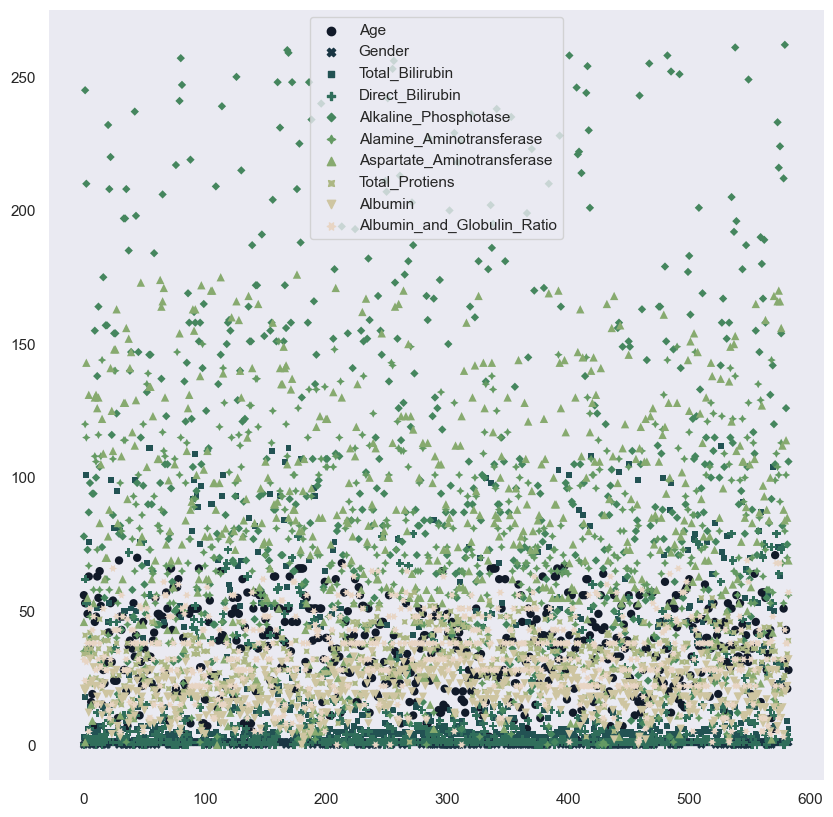

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

f, ax = plt.subplots(figsize=(10,10))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(palette="ch:r=-.7,d=.1_r",
                sizes=(2, 8), linewidth=0,
                data=X, ax=ax)

In [88]:
# import plotly.graph_objects as go
# import numpy as np

# N = 100000
# fig = go.Figure(data=go.Scattergl(
#     x = np.random.randn(N),
#     y = np.random.randn(N),
#     mode='markers',
#     marker=dict(
#         color=np.random.randn(N),
#         colorscale='Viridis',
#         line_width=1
#     )
# ))

# fig.show()

## **KDE plot using various attributes**

<AxesSubplot: xlabel='Age', ylabel='Density'>

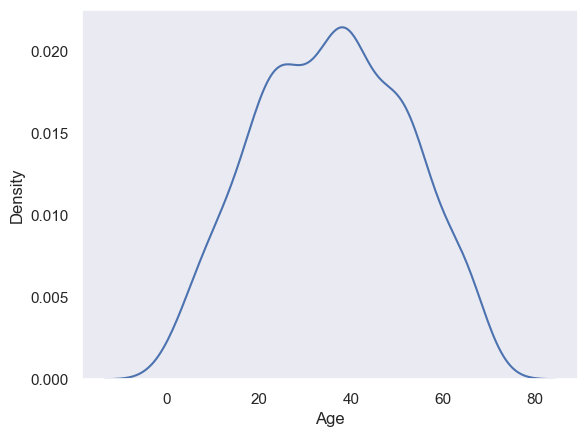

In [89]:
sns.kdeplot(data=X,x= 'Age')

<AxesSubplot: xlabel='Age', ylabel='Density'>

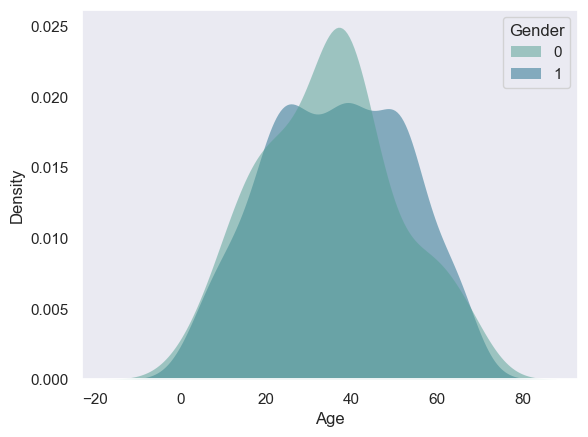

In [90]:
sns.kdeplot(data=X, x="Age", hue ='Gender', 
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0)

In [91]:
from sklearn.neural_network import MLPClassifier


In [92]:
mlp1 = MLPClassifier(max_iter=500,activation='relu')
#mlp1
mlp2 = MLPClassifier(max_iter=500,activation='relu')
#mlp2
mlp3 = MLPClassifier(hidden_layer_sizes=(10,),max_iter=500, activation='relu')
mlp3

MLPClassifier(hidden_layer_sizes=(10,), max_iter=500)

## **Training Data**

In [93]:
#mlp1.fit(X_train,y_train)
#mlp2.fit(X_train,y_train)
mlp3.fit(X_train,y_train)

D:\ml2\ml2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), max_iter=500)

In [94]:
pred1 = mlp1.predict(X_test)
#pred1
#for model 1
pred2 = mlp2.predict(X_test)
#pred2
#for model 2
pred3 = mlp3.predict(X_test)
pred3
#for model 3

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,pred3)

In [ ]:
print(classification_report(y_test,pred3))